# Задание

Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных

Выполнил: Арзигиян Георгий Ашотович

Часть 1

1. Найти датасет (например, на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html), распределение данных в котором было бы близко к

a) нормальному (визуально выглядит как кривая Гаусса - «колокол»), \
б) равномерному. 

2. Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной. 

3. Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),
дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

# Часть 1

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Нормальное распределение с несмещенной медианой

https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

Датасет содержит рост (дюймы) и вес (фунты) 25 000 разных людей 18-летнего возраста

In [2]:
df_socr = pd.read_csv('SOCR-HeightWeight.csv')

In [3]:
df_socr.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df_socr.shape

(25000, 3)

In [5]:
height = df_socr['Height(Inches)']

In [6]:
# Среднее
mean = height.mean()
print(mean)

67.99311359679999


In [7]:
# Медиана
median = height.median()
print(median)

67.9957


In [8]:
# Мода
mode = height.mode()
print(mode)

0     65.65796
1     67.34629
2     67.41672
3     67.94061
4     67.97769
5     67.98509
6     68.30287
7     68.92380
8     68.93456
9     68.97830
10    70.04724
Name: Height(Inches), dtype: float64


In [9]:
height.value_counts().head(12)

65.65796    3
67.94061    3
68.30287    3
67.41672    3
70.04724    3
68.97830    3
67.98509    3
68.92380    3
67.97769    3
67.34629    3
68.93456    3
70.91753    2
Name: Height(Inches), dtype: int64

Исходя из наличия в данных большого числа мод, сделаем вывод, что у нас - мульимодальное распределение

In [10]:
# Стандартное отклонение
std = height.std()
print(std)

1.901678771205604


In [11]:
stat, p_value = stats.shapiro(height)

print(f'Statistics={stat}, p-value={p_value}')
if p_value > 0.05:
    print("Данные распределены нормально (не отвергаем H0)")
else:
    print("Данные не распределены нормально (отвергаем H0)")

Statistics=0.9999220371246338, p-value=0.6875156164169312
Данные распределены нормально (не отвергаем H0)


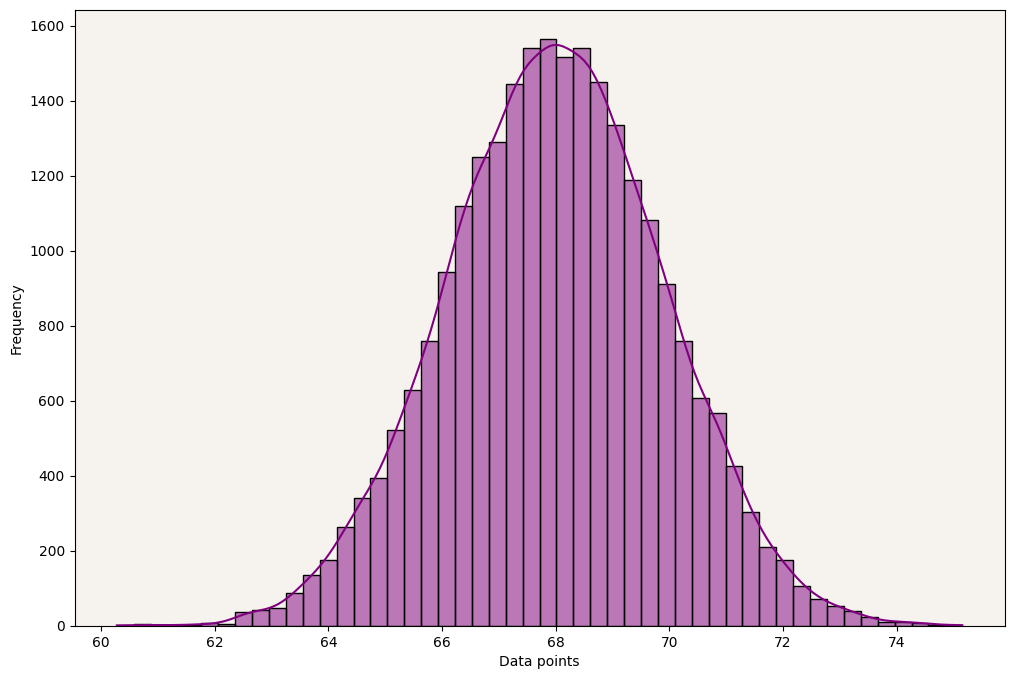

In [12]:
plt.figure(figsize=(12,8))
ax = sns.histplot(height,
                  bins=50,
                  kde=True,
                  color='purple')
ax.set(xlabel='Data points', ylabel='Frequency')
ax.set_facecolor('#f6f3ee')
plt.show()

График показывает положительную корреляцию между ростом и весом: в целом, по мере увеличения роста увеличивается вес. В данных можно заметить некоторые выбросы, например, несколько точек с очень низким весом (ниже 80 фунтов) или высоким весом (выше 160 фунтов).

# Нормальное распределение со смещенной медианой

https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit/notebook

В датасете мы рассмотрим возраст потребителей

In [13]:
df_bank = pd.read_csv('bank.csv')

In [14]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


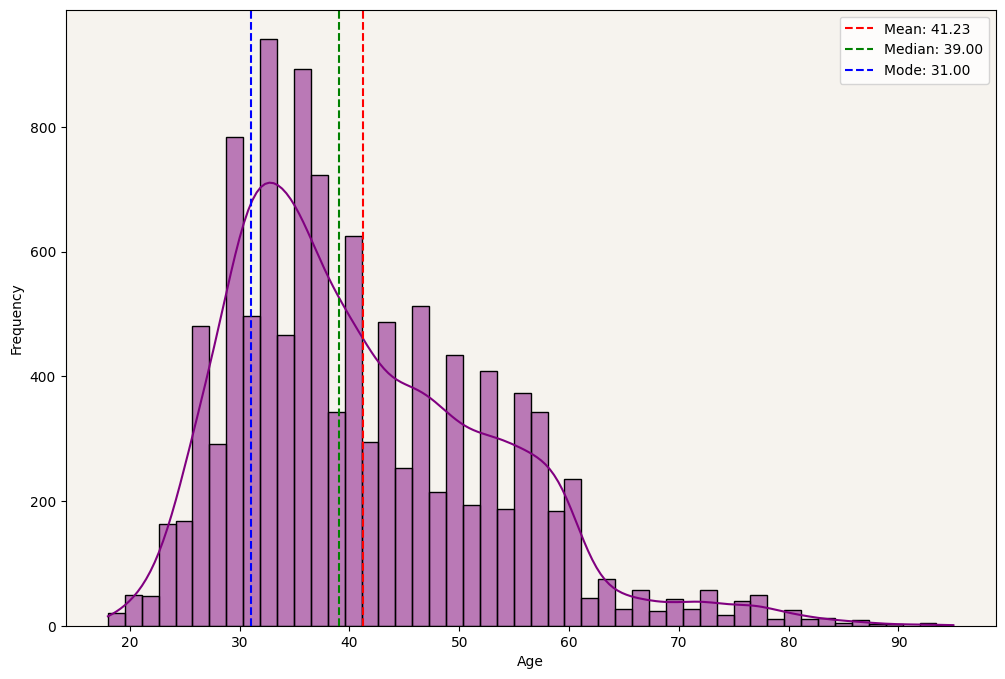

In [15]:
plt.figure(figsize=(12,8))
ax = sns.histplot(df_bank['age'], bins=50, kde=True, color='purple')

mean = np.mean(df_bank['age'])
median = np.median(df_bank['age'])
mode = stats.mode(df_bank['age'], keepdims=True)[0][0]  

ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
ax.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
ax.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')

ax.set(xlabel='Age', ylabel='Frequency')
ax.set_facecolor('#f6f3ee')
ax.legend()

plt.show()

In [16]:
skewness = stats.skew(df_bank['age'])

print(f'Skewness: {skewness}')
if skewness > 0:
    print("Распределение имеет положительное смещение (длинный правый хвост)")
elif skewness < 0:
    print("Распределение имеет отрицательное смещение (длинный левый хвост)")
else:
    print("Распределение симметричное")

Skewness: 0.8626636888266407
Распределение имеет положительное смещение (длинный правый хвост)


# Равномерное распределение

Сгенерируем равномерное распределение самостоятельно, поскольку датасеты с необходимым распределением практически отсутствуют

[0.73226563 0.15383133 0.52873308 0.7913757  0.42123625 0.08032078
 0.04052394 0.49076264 0.08345268 0.20132269]


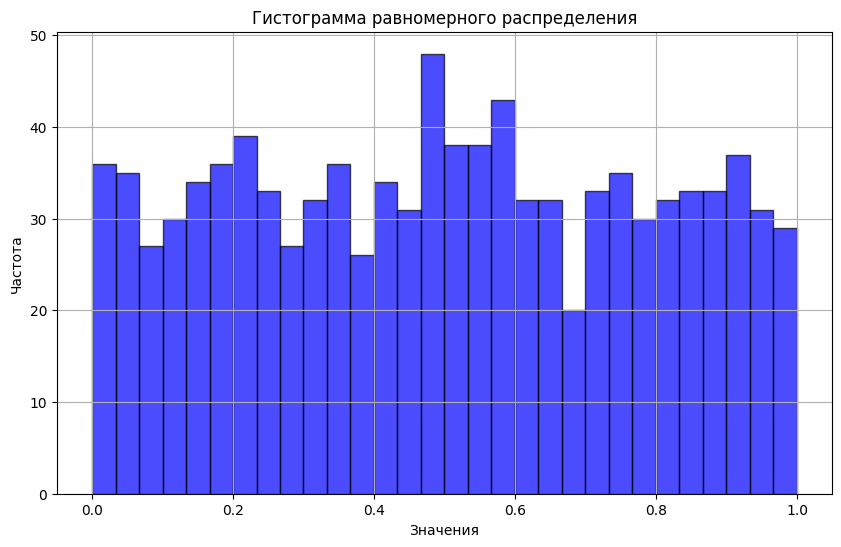

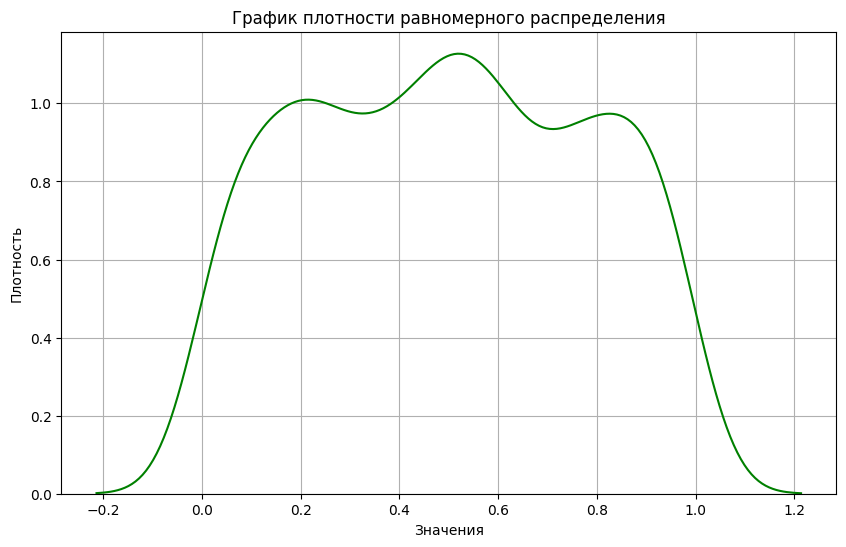

Statistics=0.02793164870829068, p-value=0.40879887672372617
Данные распределены равномерно (не отвергаем H0)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Генерация данных с равномерным распределением
# Данные будут в диапазоне от 0 до 1, 1000 точек
uniform_data = np.random.uniform(0, 1, 1000)

# Вывод первых нескольких значений для проверки
print(uniform_data[:10])

plt.figure(figsize=(10, 6))
plt.hist(uniform_data, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма равномерного распределения')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(uniform_data, color='green')
plt.title('График плотности равномерного распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

# Выполнение теста Колмогорова-Смирнова для проверки равномерного распределения
stat, p_value = stats.kstest(uniform_data, 'uniform')

print(f'Statistics={stat}, p-value={p_value}')
if p_value > 0.05:
    print("Данные распределены равномерно (не отвергаем H0)")
else:
    print("Данные не распределены равномерно (отвергаем H0)")
